### PSATJIRA

In [1]:
from data_import import *
from data_analysis import *
from prediction import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

### Importing data

In [2]:
ts_dict = import_precipitation_ts()
plants = get_plants()
plant_on_analysis = "PSATJIRA"

### Data Analysis


In [3]:
#precipitation_plots(ts_dict, plant_on_analysis)

In [4]:
#is_stationary(ts_dict, "PSATJIRA")

### Preparing Data for Prediction

In [5]:
df = ts_dict[plant_on_analysis].dropna(axis=0)
X_train, X_test, y_train, y_test= split_train_test_by_size(df)

### Prediction without cfs and gefs

Evaluation 0:
Train size: 788
Val size: 781
RMSE: 5.805053842619198

Evaluation 1:
Train size: 1569
Val size: 781
RMSE: 5.244128901750576

Evaluation 2:
Train size: 2350
Val size: 781
RMSE: 5.564837358213129

Evaluation 3:
Train size: 3131
Val size: 781
RMSE: 5.824118928525804

Evaluation 4:
Train size: 3912
Val size: 781
RMSE: 5.2779481884677955

Evaluation 5:
Train size: 4693
Val size: 781
RMSE: 5.992057135972755

Evaluation 6:
Train size: 5474
Val size: 781
RMSE: 5.677893719751319

Evaluation 7:
Train size: 6255
Val size: 781
RMSE: 5.589594600085052

Evaluation 8:
Train size: 7036
Val size: 781
RMSE: 5.74865107397147

Evaluation 9:
Train size: 7817
Val size: 781
RMSE: 5.488437415435719

Mean rmse: 5.621272116479282


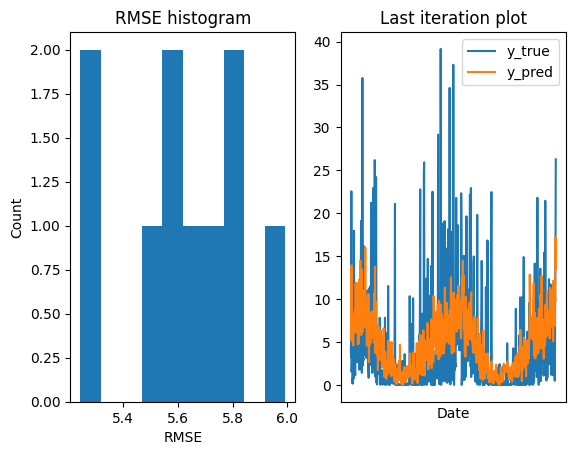

In [6]:
knn = KNeighborsRegressor(n_neighbors=10)
cross_validation(knn, X_train, y_train)

Evaluation 0:
Train size: 788
Val size: 781
RMSE: 5.479985174756586

Evaluation 1:
Train size: 1569
Val size: 781
RMSE: 5.113632734798561

Evaluation 2:
Train size: 2350
Val size: 781
RMSE: 5.164374896983406

Evaluation 3:
Train size: 3131
Val size: 781
RMSE: 5.534855187350505

Evaluation 4:
Train size: 3912
Val size: 781
RMSE: 5.007423026129963

Evaluation 5:
Train size: 4693
Val size: 781
RMSE: 5.568221653790289

Evaluation 6:
Train size: 5474
Val size: 781
RMSE: 5.144622882535045

Evaluation 7:
Train size: 6255
Val size: 781
RMSE: 5.1374903808972165

Evaluation 8:
Train size: 7036
Val size: 781
RMSE: 5.404541523829231

Evaluation 9:
Train size: 7817
Val size: 781
RMSE: 5.060925610619242

Mean rmse: 5.261607307169005


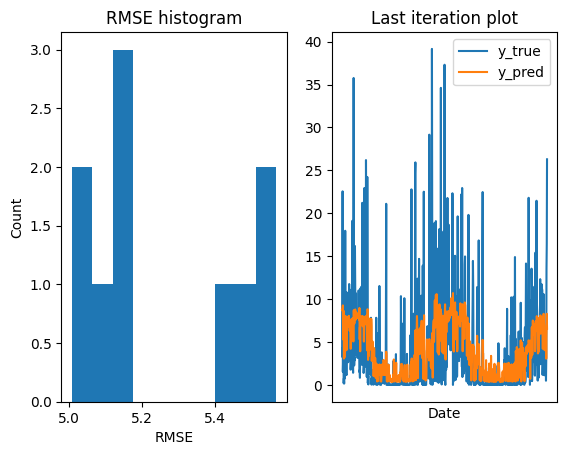

In [7]:
rf = RandomForestRegressor(n_estimators=20, max_depth=5, criterion="squared_error")
cross_validation(rf, X_train, y_train)

### Prediction with cfs and gefs

In [8]:
dfcg = df.copy()
c = pd.read_csv("../data/ts-PSATJIRA-cfs-model.csv", index_col=[0])
g = pd.read_csv("../data/ts-PSATJIRA-gefs-model.csv", index_col=[0])
dfcg = pd.concat([dfcg, c], axis=1).dropna(axis=0)
dfcg = pd.concat([dfcg, g], axis=1).dropna(axis=0)

In [9]:
X_traincg, X_testcg, y_traincg, y_testcg = split_train_test_by_size(dfcg)
X_traincg, X_testcg = preprocess(X_traincg, X_testcg)

Evaluation 0:
Train size: 51
Val size: 43
RMSE: 7.82410342588811

Evaluation 1:
Train size: 94
Val size: 43
RMSE: 4.248335155897253

Evaluation 2:
Train size: 137
Val size: 43
RMSE: 4.937517215252208

Evaluation 3:
Train size: 180
Val size: 43
RMSE: 4.18819175014825

Evaluation 4:
Train size: 223
Val size: 43
RMSE: 3.4376808314084633

Evaluation 5:
Train size: 266
Val size: 43
RMSE: 1.1557623738103537

Evaluation 6:
Train size: 309
Val size: 43
RMSE: 2.224286829124826

Evaluation 7:
Train size: 352
Val size: 43
RMSE: 3.1954155898658074

Evaluation 8:
Train size: 395
Val size: 43
RMSE: 5.1195933643121005

Evaluation 9:
Train size: 438
Val size: 43
RMSE: 4.284976176276672

Mean rmse: 4.061586271198404


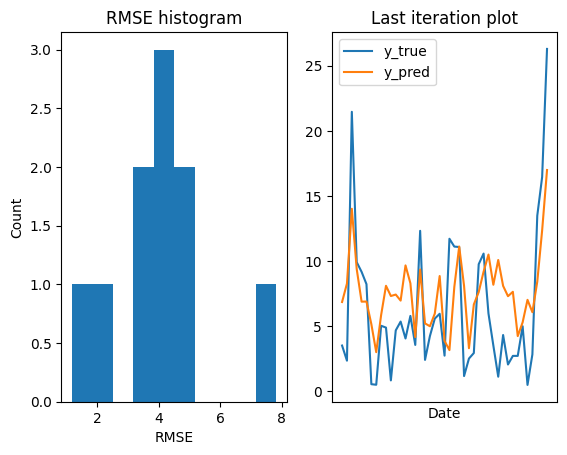

In [10]:
knn = KNeighborsRegressor(n_neighbors=10)
cross_validation(knn, X_traincg, y_traincg)

Evaluation 0:
Train size: 51
Val size: 43
RMSE: 6.752537627156627

Evaluation 1:
Train size: 94
Val size: 43
RMSE: 4.21773327244153

Evaluation 2:
Train size: 137
Val size: 43
RMSE: 3.8019002972958535

Evaluation 3:
Train size: 180
Val size: 43
RMSE: 2.1148590579679682

Evaluation 4:
Train size: 223
Val size: 43
RMSE: 2.075831080464605

Evaluation 5:
Train size: 266
Val size: 43
RMSE: 2.4439719788897754

Evaluation 6:
Train size: 309
Val size: 43
RMSE: 1.8944934966495006

Evaluation 7:
Train size: 352
Val size: 43
RMSE: 3.167387333972955

Evaluation 8:
Train size: 395
Val size: 43
RMSE: 3.6083003287955435

Evaluation 9:
Train size: 438
Val size: 43
RMSE: 4.386831940689156

Mean rmse: 3.4463846414323513


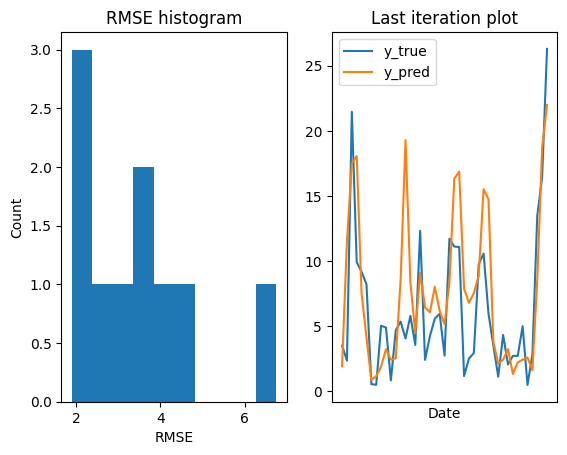

In [11]:
rf = RandomForestRegressor(n_estimators=40, max_depth=10, criterion="squared_error", random_state=0)
cross_validation(rf, X_traincg, y_traincg)